### Q-LEARNING TAXI

Literatura:

Książka: Introduction to RL
Richard S. Sutton and Andrew G. Barto
https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf

In [ ]:
!pip install cmake 'gym[atari]' scipy

In [ ]:
!pip install gym[toy_text]

In [ ]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
!apt-get install  xvfb
!apt-get install python-opengl ffmpeg'


from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
import gym
import numpy as np
import random
env = gym.make('Taxi-v3')


In [ ]:
# przypisanie do zmiennych ilosc akcji i mozliwych stanow
action_size = env.action_space.n
state_size = env.observation_space.n

# utworzenie tablicy Q o wymiarach state_size x action_size
Q = np.zeros((state_size,action_size))

# utworzenie list dzięki którym utworzone zostaną wykresy przedstawiające
# poziom nauki
timesteps_list = []
penalties_list = []
games_table = []

# parametry
alpha = 0.8
gamma = 0.5
iterations = 10000

for z in range(iterations):
  #ile iteracji bylo
  epochs = 0
  penalties, reward = 0, 0
  state = env.reset() #zaczynamy nową grę


  frames = [] # list for storing animation


  done = False


  while not done:
      #take random action allowed by environment
      action = np.argmax(Q[state,:])
      #env reponds
      new_state, reward, done, info = env.step(action)

      Q[state,action] = Q[state,action] + alpha*(reward + gamma*np.max(Q[new_state,:]) - Q[state,action])

      if reward == -10:
          penalties += 1

      state = new_state
      # Put each rendered frame into dict for animation
      frames.append({
          'frame': env.render(mode='ansi'),
          'state': state,
          'action': action,
          'reward': reward
          }
      )
      epochs += 1

  games_table.append(z)
  print("Timesteps taken: {}".format(epochs))
  print("Penalties incurred: {}".format(penalties))
  timesteps_list.append(epochs)
  penalties_list.append(penalties)


Streaming output truncated to the last 5000 lines.
Timesteps taken: 14
Penalties incurred: 0
Timesteps taken: 13
Penalties incurred: 0
Timesteps taken: 16
Penalties incurred: 0
Timesteps taken: 10
Penalties incurred: 0
Timesteps taken: 13
Penalties incurred: 0
Timesteps taken: 16
Penalties incurred: 0
Timesteps taken: 9
Penalties incurred: 0
Timesteps taken: 14
Penalties incurred: 0
Timesteps taken: 15
Penalties incurred: 0
Timesteps taken: 10
Penalties incurred: 0
Timesteps taken: 10
Penalties incurred: 0
Timesteps taken: 12
Penalties incurred: 0
Timesteps taken: 11
Penalties incurred: 0
Timesteps taken: 12
Penalties incurred: 0
Timesteps taken: 16
Penalties incurred: 0
Timesteps taken: 13
Penalties incurred: 0
Timesteps taken: 14
Penalties incurred: 0
Timesteps taken: 10
Penalties incurred: 0
Timesteps taken: 13
Penalties incurred: 0
Timesteps taken: 10
Penalties incurred: 0
Timesteps taken: 16
Penalties incurred: 0
Timesteps taken: 13
Penalties incurred: 0
Timesteps taken: 15
Penalt

Text(0, 0.5, 'timesteps')

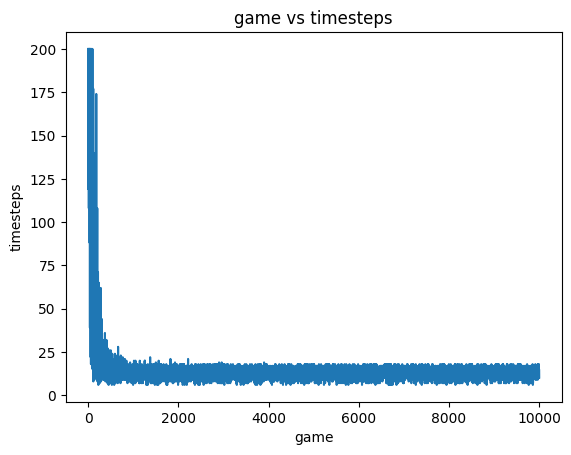

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(games_table, timesteps_list)
plt.title("game vs timesteps")
plt.xlabel("game")
plt.ylabel("timesteps")

Text(0, 0.5, 'penalties')

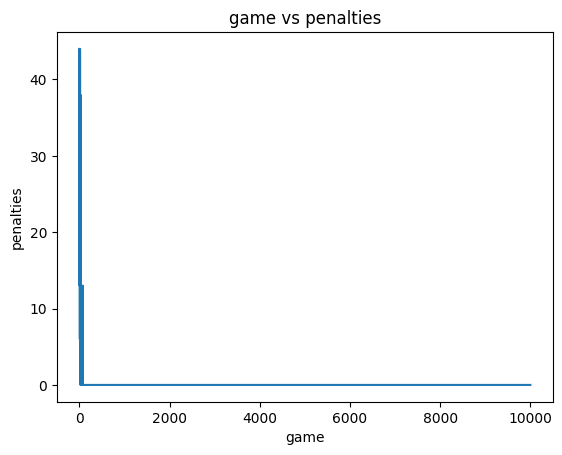

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(games_table, penalties_list)
plt.title("game vs penalties")
plt.xlabel("game")
plt.ylabel("penalties")

In [ ]:
#show animation of taxi move from cell above


#https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
from IPython.display import clear_output
from time import sleep


def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])#.getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        # jaki odstep w czasie miedzy obrazkami
        # kolejnych krokow agenta
        sleep(.4)

print_frames(frames)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 10
State: 85
Action: 5
Reward: 20


### Q-LEARNING TAXI WITH EPSILON-GREEDY


In [ ]:
import gym
import numpy as np
import random
env = gym.make('Taxi-v3')


In [ ]:
# utworzona funkcja epsilon_greedy na podstawie algorytmu w postaci pseudokodu
def epsilon_greedy(Q, state, epsilon):
  n = random.uniform(0,1)

  if n < epsilon:
      return env.action_space.sample()
  else:
      return np.argmax(Q[state,:])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# przypisanie do zmiennych ilosc akcji i mozliwych stanow
action_size = env.action_space.n
state_size = env.observation_space.n

# utworzenie tablicy Q o wymiarach state_size x action_size
Q = np.zeros((state_size,action_size))

# utworzenie list dzięki którym utworzone zostaną wykresy przedstawiające
# poziom nauki
timesteps_epsilon_list = []
penalties_epsilon_list = []
games_epsilon_table = []

# parametry
alpha = 0.4
gamma = 0.95
epsilon = 1
iterations = 10000

# wykonannie petli z funkcja epsilon_greedy
for z in range(iterations):
  if epsilon < 0:
    break
  #ile iteracji bylo
  epochs = 0
  penalties, reward = 0, 0
  state = env.reset() #zaczynamy nową grę


  frames = [] # list for storing animation


  done = False


  while not done:

      action = epsilon_greedy(Q, state, epsilon)
      #take random action allowed by environment
      #action = np.argmax(Q[state,:])
      #env reponds
      new_state, reward, done, info = env.step(action)

      Q[state,action] = Q[state,action] + alpha*(reward + gamma*np.max(Q[new_state,:]) - Q[state,action])

      if reward == -10:
          penalties += 1

      state = new_state
      # Put each rendered frame into dict for animation
      frames.append({
          'frame': env.render(mode='ansi'),
          'state': state,
          'action': action,
          'reward': reward
          }
      )
      epochs += 1
  games_epsilon_table.append(z)
  print("Timesteps taken: {}".format(epochs))
  print("Penalties incurred: {}".format(penalties))
  timesteps_epsilon_list.append(epochs)
  penalties_epsilon_list.append(penalties)

  epsilon -= 0.005

Timesteps taken: 122
Penalties incurred: 39
Timesteps taken: 200
Penalties incurred: 54
Timesteps taken: 200
Penalties incurred: 60
Timesteps taken: 200
Penalties incurred: 75
Timesteps taken: 200
Penalties incurred: 83
Timesteps taken: 200
Penalties incurred: 60
Timesteps taken: 200
Penalties incurred: 63
Timesteps taken: 200
Penalties incurred: 60
Timesteps taken: 200
Penalties incurred: 62
Timesteps taken: 200
Penalties incurred: 60
Timesteps taken: 200
Penalties incurred: 63
Timesteps taken: 119
Penalties incurred: 34
Timesteps taken: 200
Penalties incurred: 70
Timesteps taken: 200
Penalties incurred: 59
Timesteps taken: 200
Penalties incurred: 65
Timesteps taken: 200
Penalties incurred: 62
Timesteps taken: 200
Penalties incurred: 68
Timesteps taken: 200
Penalties incurred: 67
Timesteps taken: 200
Penalties incurred: 64
Timesteps taken: 200
Penalties incurred: 51
Timesteps taken: 200
Penalties incurred: 59
Timesteps taken: 200
Penalties incurred: 60
Timesteps taken: 200
Penalties i

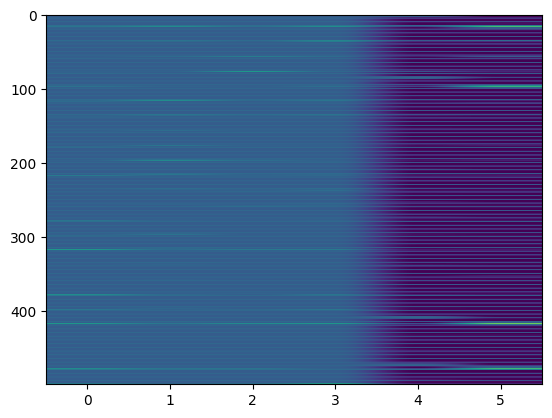

In [ ]:
qmin = np.min(Q)
qmax = np.max(Q)

plt.imshow((((Q - qmin)/(qmax - qmin))*255).astype('int'), aspect = 'auto')

Text(0, 0.5, 'timesteps')

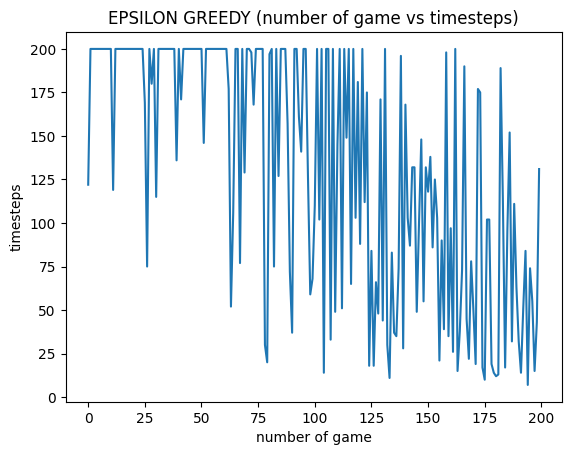

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(games_epsilon_table, timesteps_epsilon_list)
plt.title("EPSILON GREEDY (number of game vs timesteps)")
plt.xlabel("number of game")
plt.ylabel("timesteps")

Text(0, 0.5, 'penalties')

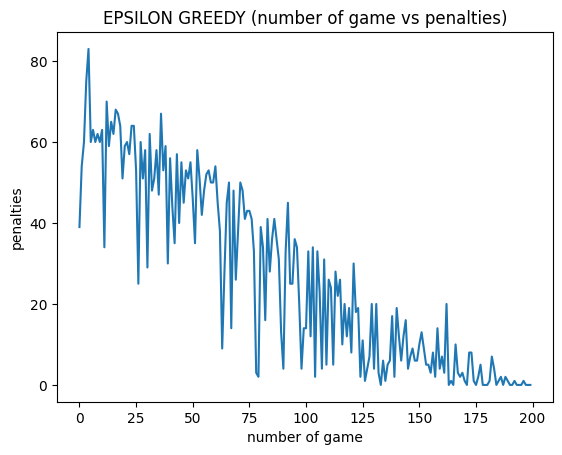

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(games_epsilon_table, penalties_epsilon_list)
plt.title("EPSILON GREEDY (number of game vs penalties)")
plt.xlabel("number of game")
plt.ylabel("penalties")

In [ ]:
#show animation of taxi move from cell above


#https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
from IPython.display import clear_output
from time import sleep


def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])#.getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        # jaki odstep w czasie miedzy obrazkami
        # kolejnych krokow agenta
        sleep(.4)

print_frames(frames)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 41
State: 410
Action: 5
Reward: 20


### Q-LEARNING TAXI WITH SARSA

In [ ]:
import gym
import numpy as np
import random
env = gym.make('Taxi-v3')


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
import random
import time
from IPython import display as ipythondisplay

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# utworzona funkcja epsilon_greedy na podstawie algorytmu w postaci pseudokodu
def epsilon_greedy(Q, state, epsilon):
  n = random.uniform(0,1)

  if n < epsilon:
      return random.randint(0,5)
  else:
      return np.argmax(Q[state,:])

In [ ]:
# przypisanie do zmiennych ilosc akcji i mozliwych stanow
action_size = env.action_space.n
state_size = env.observation_space.n

# utworzenie tablicy Q o wymiarach state_size x action_size
Q = np.zeros((state_size,action_size))

# utworzenie list dzięki którym utworzone zostaną wykresy przedstawiające
# poziom nauki
timesteps_sarsa_list = []
penalties_sarsa_list = []
games_sarsa_table = []

# parametry
alpha = 0.1
gamma = 0.95
epsilon = 1
iterations = 10000

# wykonannie petli z funkcja epsilon_greedy
for z in range(iterations):
  if epsilon < 0:
    break
  #ile iteracji bylo
  epochs = 0
  penalties, reward = 0, 0

  state = env.reset() #zaczynamy nową grę
  action = epsilon_greedy(Q, state, epsilon)

  frames = [] # list for storing animation


  done = False


  while not done:

      new_state, reward, done, info = env.step(action)
      new_action = epsilon_greedy(Q, new_state, epsilon)

      Q[state,action] = Q[state,action] + alpha*(reward + gamma*Q[new_state,new_action] - Q[state, action])

      if reward == -10:
          penalties += 1

      state = new_state
      action = new_action


      # Put each rendered frame into dict for animation
      frames.append({
          'frame': env.render(mode='ansi'),
          'state': state,
          'action': action,
          'reward': reward
          }
      )
      epochs += 1
      #print(f"Epoka: {epochs}, nagrody {reward}")




  games_sarsa_table.append(z)
  print("Timesteps taken: {}".format(epochs))
  print("Penalties incurred: {}".format(penalties))
  print(f"Epsilon {epsilon}")
  timesteps_sarsa_list.append(epochs)
  penalties_sarsa_list.append(penalties)

  epsilon -= 0.001

Timesteps taken: 200
Penalties incurred: 58
Epsilon 1
Timesteps taken: 200
Penalties incurred: 56
Epsilon 0.999
Timesteps taken: 200
Penalties incurred: 61
Epsilon 0.998
Timesteps taken: 200
Penalties incurred: 54
Epsilon 0.997
Timesteps taken: 200
Penalties incurred: 66
Epsilon 0.996
Timesteps taken: 200
Penalties incurred: 54
Epsilon 0.995
Timesteps taken: 200
Penalties incurred: 65
Epsilon 0.994
Timesteps taken: 200
Penalties incurred: 77
Epsilon 0.993
Timesteps taken: 200
Penalties incurred: 73
Epsilon 0.992
Timesteps taken: 200
Penalties incurred: 67
Epsilon 0.991
Timesteps taken: 200
Penalties incurred: 68
Epsilon 0.99
Timesteps taken: 94
Penalties incurred: 23
Epsilon 0.989
Timesteps taken: 200
Penalties incurred: 61
Epsilon 0.988
Timesteps taken: 200
Penalties incurred: 73
Epsilon 0.987
Timesteps taken: 200
Penalties incurred: 60
Epsilon 0.986
Timesteps taken: 200
Penalties incurred: 63
Epsilon 0.985
Timesteps taken: 200
Penalties incurred: 69
Epsilon 0.984
Timesteps taken: 200

Text(0, 0.5, 'timesteps')

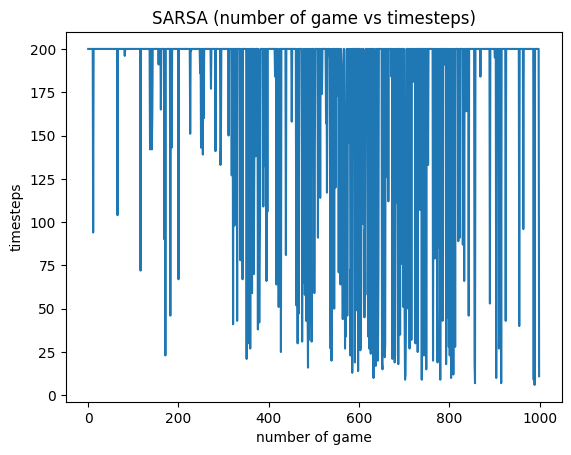

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(games_sarsa_table, timesteps_sarsa_list)
plt.title("SARSA (number of game vs timesteps)")
plt.xlabel("number of game")
plt.ylabel("timesteps")

Text(0, 0.5, 'penalties')

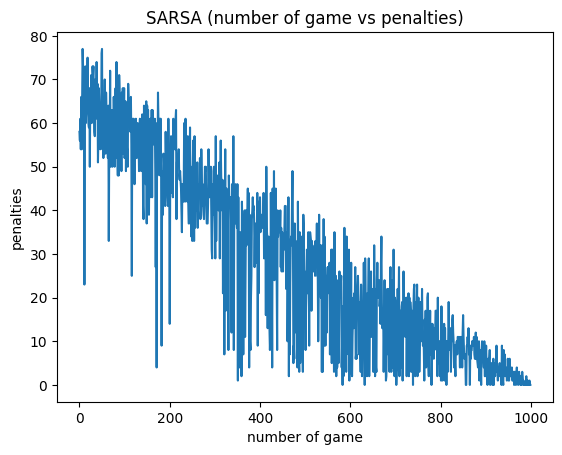

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(games_sarsa_table, penalties_sarsa_list)
plt.title("SARSA (number of game vs penalties)")
plt.xlabel("number of game")
plt.ylabel("penalties")

In [ ]:
#show animation of taxi move from cell above


#https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
from IPython.display import clear_output
from time import sleep


def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])#.getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        # jaki odstep w czasie miedzy obrazkami
        # kolejnych krokow agenta
        sleep(.4)

print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 11
State: 0
Action: 0
Reward: 20
